Prediction fuel efficiency using Deep Learning<br>


*   MPG: Mileage Per Gallon
*   Mileage: Distance travel in miles

*   Horse Power: Rate at which work is done(one horsepower equals 33,000 foot-pounds of work per minute).





In [2]:
import pandas as pd
import numpy as np 

Data Loading

In [3]:
data=pd.read_csv(r"https://raw.githubusercontent.com/amankharwal/Website-data/master/auto-mpg.csv")

In [4]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
data.shape

(398, 9)

In [6]:
data.dtypes
# Note: one feature is object dtye

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
# Null status in data
data.isnull().sum(axis=1)
# no null values

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    0
395    0
396    0
397    0
Length: 398, dtype: int64

In [8]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


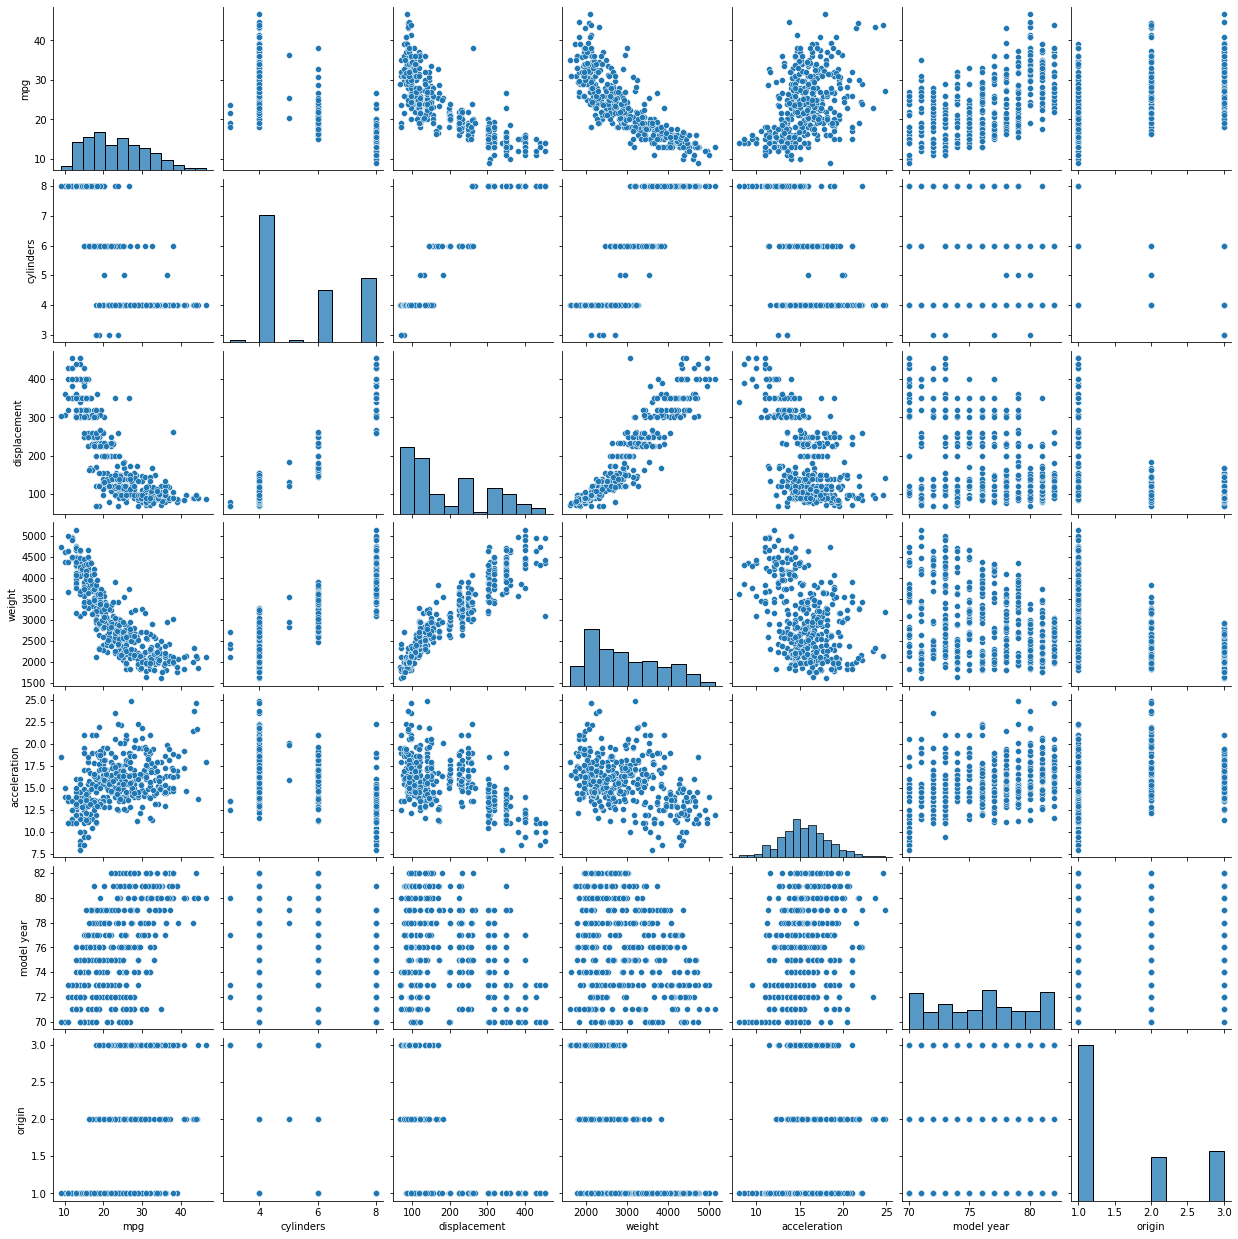

In [10]:
import seaborn as sns
sns.pairplot(data)

Data Preprocessing

Text(0.5, 1.0, 'Car Names Histogram')

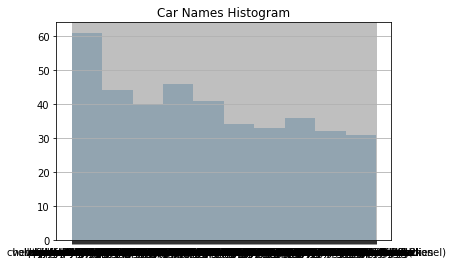

In [11]:
data["car name"].hist()
import matplotlib.pyplot as plt
plt.title("Car Names Histogram")

In [12]:
un=data["car name"]
un

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
def encode(data):
  en=LabelEncoder()
  final=en.fit_transform(data)
  return final

In [14]:
car_encode=encode(un)
car_encode

array([ 49,  36, 231,  14, 161, 141,  54, 223, 241,   1, 101, 215,  57,
        30, 274, 220,   8, 150,  95, 282, 211,  16, 258,  22,   7, 133,
        68, 112, 163,  95,  65, 271, 156,   7, 232,  49, 162,  10,  54,
       242, 141, 223, 116, 129, 250,   9,  64, 243, 151, 187, 208, 210,
       123, 267,  76, 286, 218, 272, 105, 293,  63, 158,  54, 241, 223,
       141,   2, 192,  31, 203,  75, 183,  11,  48, 143, 233, 295, 283,
       212, 253, 157,  85, 279, 104, 268,  25,  10,  55, 142, 109, 193,
        44, 148, 222,  74,  29,   0, 235,  62,   8, 150, 220, 292,  54,
       128, 219, 207,   7, 263,  63,  87, 174, 156, 188, 121,  59, 244,
       124, 209,  17, 294, 113, 260, 276, 204, 220, 150,   8,  61,  92,
       156, 267,  63,  50,  10, 234, 142,  27, 110, 143,  11,  21, 284,
       209, 271,  88, 103, 124, 122, 167, 261, 127, 236,  61, 194, 150,
       241,  42, 224, 148,  24,  41,  10, 221,  34,  60, 154, 266, 156,
         7, 240, 271, 284,  88, 156, 287,  12,  17, 211, 296, 26

In [15]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
sample=data.copy()
sample.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [17]:
sample=sample.drop(["car name"],axis=1)
sample.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [18]:
sample["car_encode_name"]=car_encode

In [19]:
sample.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_encode_name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,231
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,161


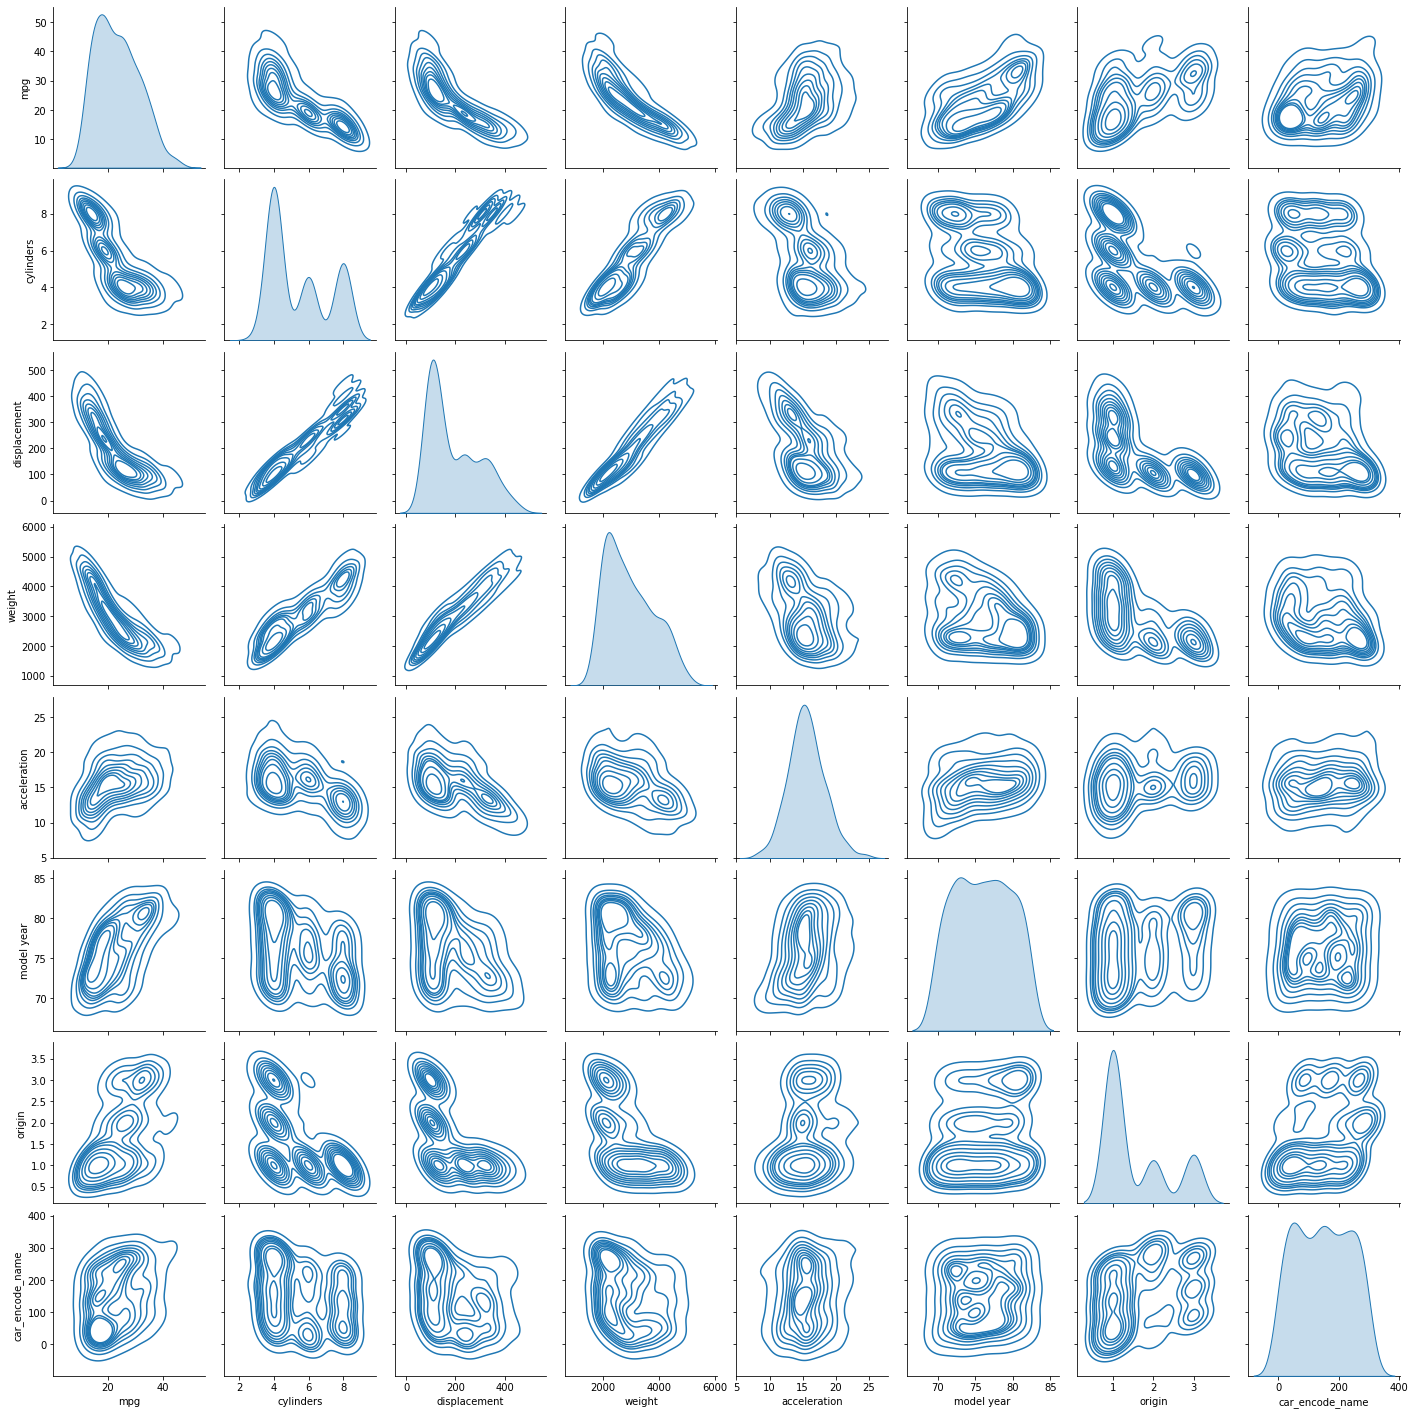

In [20]:
sns.pairplot(sample,kind="kde")

<AxesSubplot:>

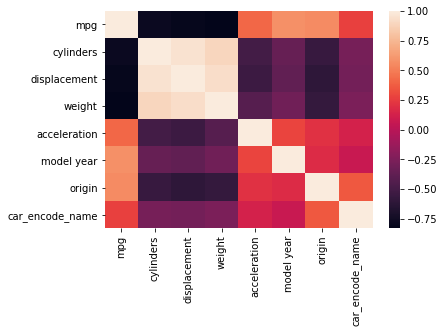

In [21]:
crel=sample.corr()
sns.heatmap(crel)

Text(0.5, 1.0, 'MPG vs origin')

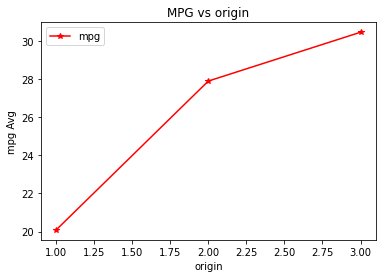

In [22]:
sample.loc[:,["mpg"]].groupby(data["origin"]).mean().plot(color="r",marker="*")
plt.ylabel("mpg Avg")
plt.title("MPG vs origin")

Text(0.5, 1.0, '[ cyclinders/ displacement] vs origin')

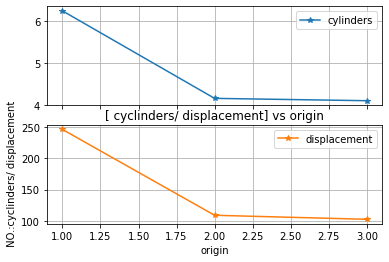

In [23]:
sample.loc[:,["cylinders", "displacement"]].groupby(data["origin"]).mean().plot(subplots=True,marker="*",grid=True)
plt.ylabel(" NO.:cyclinders/ displacement")
plt.title("[ cyclinders/ displacement] vs origin")

Text(0.5, 1.0, '[ weight] vs origin')

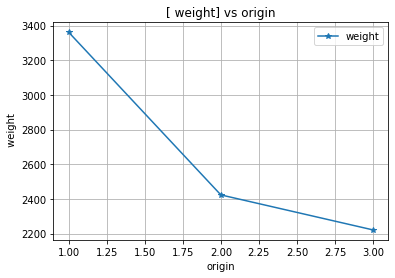

In [24]:
sample.loc[:,[ "weight"]].groupby(data["origin"]).mean().plot(marker="*",grid=True)
plt.ylabel(" weight")
plt.title("[ weight] vs origin")

Text(0.5, 1.0, '[ weight] vs origin')

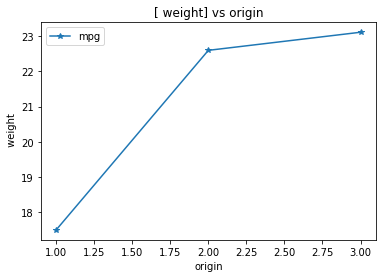

In [25]:
sample.loc[:,[ "mpg"]].groupby(data["acceleration"]).mean().groupby(sample["origin"]).mean().plot(marker="*")
plt.ylabel(" weight")
plt.title("[ weight] vs origin")

array([<AxesSubplot:xlabel='origin,acceleration'>], dtype=object)

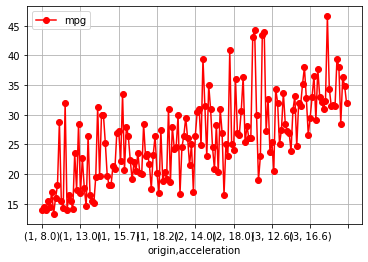

In [26]:
sample.loc[:,[ "mpg"]].groupby([sample["origin"],sample['acceleration']]).mean().plot(subplots=True,
                                                                                      color="r",
                                                                                      marker="o",
                                                                                      grid=True)

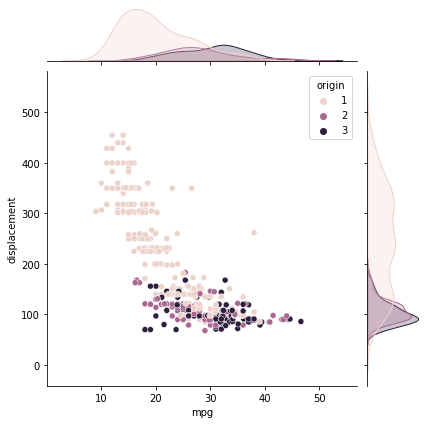

In [27]:
sns.jointplot(data=sample,x=sample["mpg"],y=sample["displacement"],hue=sample["origin"])

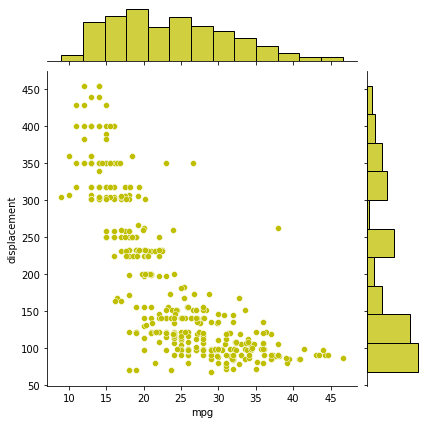

In [28]:
sns.jointplot(data=sample,x=sample["mpg"],y=sample["displacement"],color="y")

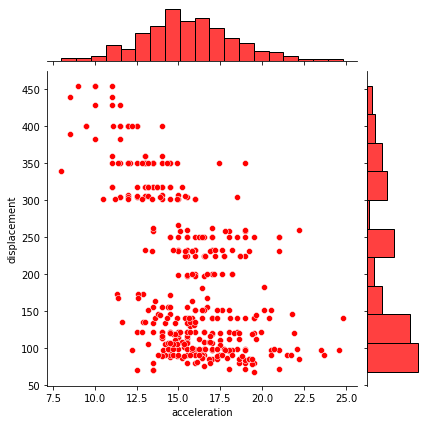

In [29]:
sns.jointplot(data=sample,x=sample["acceleration"],y=sample["displacement"],color="r")

<AxesSubplot:xlabel='acceleration', ylabel='displacement'>

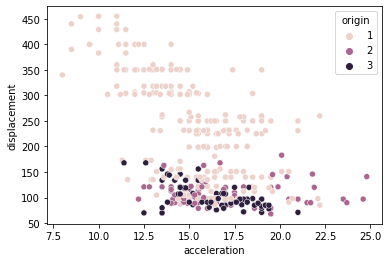

In [87]:
sns.scatterplot(data=sample,x=sample["acceleration"],y=sample["displacement"],hue=sample["origin"])

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

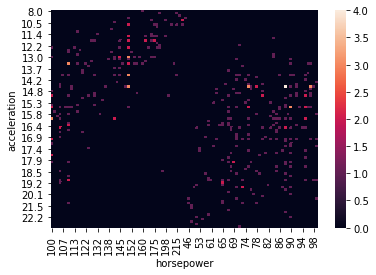

In [31]:
n1=pd.crosstab(sample["acceleration"],sample["horsepower"])
sns.heatmap(n1)

In [32]:
sample.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car_encode_name'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

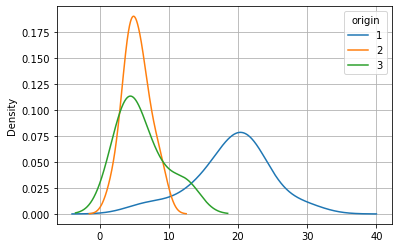

In [33]:
pd.crosstab(sample["model year"],sample["origin"]).plot(kind="kde",grid=True)

In [34]:
data["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [35]:
def ob_to_int(data,col):
  new=[]
  for i in data[col]:
    if i!="?":
      new.append(float(i))
      
    else:
      x=np.mean(new)
      new.append(x)
  col1=pd.Series(new)
  return col1
xtra=ob_to_int(sample,"horsepower")

In [36]:
sample["horse_power_update"]=xtra
sample=sample.drop(["horsepower"],axis=1)

In [37]:
sample.dtypes

mpg                   float64
cylinders               int64
displacement          float64
weight                  int64
acceleration          float64
model year              int64
origin                  int64
car_encode_name         int32
horse_power_update    float64
dtype: object

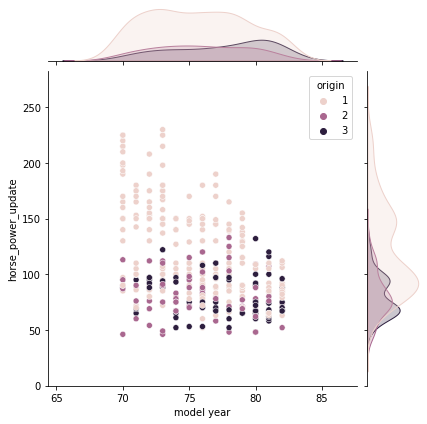

In [38]:
sns.jointplot(data=sample,x=sample["model year"],y=sample["horse_power_update"],hue=sample["origin"],color="red")

data Normalization


In [39]:
sample.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car_encode_name,horse_power_update
0,18.0,8,307.0,3504,12.0,70,1,49,130.0
1,15.0,8,350.0,3693,11.5,70,1,36,165.0
2,18.0,8,318.0,3436,11.0,70,1,231,150.0
3,16.0,8,304.0,3433,12.0,70,1,14,150.0
4,17.0,8,302.0,3449,10.5,70,1,161,140.0


In [40]:
#Normalization
from sklearn.preprocessing import normalize
d1=pd.DataFrame(normalize(sample,axis=1),columns=sample.columns)
d1

,mpg,cylinders,displacement,weight,acceleration,model year,origin,car_encode_name,horse_power_update
0,0.005112,0.002272,0.087193,0.995190,0.003408,0.019881,0.000284,0.013917,0.036922
1,0.004039,0.002154,0.094235,0.994317,0.003096,0.018847,0.000269,0.009693,0.044425
2,0.005199,0.002311,0.091843,0.992364,0.003177,0.020217,0.000289,0.066716,0.043322
3,0.004637,0.002319,0.088103,0.994928,0.003478,0.020287,0.000290,0.004057,0.043472
4,0.004900,0.002306,0.087043,0.994081,0.003026,0.020176,0.000288,0.046404,0.040351
...,...,...,...,...,...,...,...,...,...
393,0.009641,0.001428,0.049993,0.996288,0.005571,0.029282,0.000357,0.054635,0.030710
394,0.020407,0.001855,0.044988,0.987881,0.011409,0.038031,0.000928,0.139602,0.024117
395,0.013881,0.001735,0.058561,0.995536,0.005032,0.035570,0.000434,0.051620,0.036438
396,0.010625,0.001518,0.045537,0.996119,0.007058,0.031117,0.000379,0.060336,0.029978


In [41]:
#x=d1.iloc[:,1:]
#y=d1.iloc[:,0]
x=sample.iloc[:,1:]
y=sample.iloc[:,0]

In [42]:
x.head()

,cylinders,displacement,weight,acceleration,model year,origin,car_encode_name,horse_power_update
0,8,307.0,3504,12.0,70,1,49,130.0
1,8,350.0,3693,11.5,70,1,36,165.0
2,8,318.0,3436,11.0,70,1,231,150.0
3,8,304.0,3433,12.0,70,1,14,150.0
4,8,302.0,3449,10.5,70,1,161,140.0


In [43]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [45]:
x_train.shape

(318, 8)

Model Definition

In [46]:
import tensorflow as tf
import keras
from tensorflow.keras import models,Sequential
from keras.layers import Dense, MaxPool2D

In [47]:
x_train.shape[1]

8

In [48]:
model=Sequential()
model.add(Dense(x.shape[1],
                activation="relu",
                input_shape=[x.shape[1]]))
model.add(Dense(32,activation="relu"))
#model.add(Dense(64,activation=tf.nn.relu))
#model.add(Dense(128,activation=tf.nn.relu))
#model.add(Dense(62,activation=tf.nn.relu))
model.add(Dense(32,activation=tf.nn.relu))
model.add(Dense(1,activation=tf.nn.relu))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,449
Trainable params: 1,449
Non-trainable params: 0
_________________________________________________________________


In [50]:
import tensorflow
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tensorflow.keras.losses.MeanSquaredError(),
              metrics=['mean_absolute_error', 'mean_squared_error',"accuracy"])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,449
Trainable params: 1,449
Non-trainable params: 0
_________________________________________________________________


In [52]:
# earlystops and callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
earlyStop=EarlyStopping(monitor="mean_squared_error",
                        min_delta=0.001,
                        patience=20,
                        verbose=1,
                        restore_best_weights=True)
checkpoint=ModelCheckpoint(filepath="/content/fuel.h5",
                           monitor="mean_squared_error",
                           save_best_only=True)
calls=[earlyStop,checkpoint]


In [53]:
fresh_model=model.fit(x=x_train,
                      y=y_train,
                      epochs=50,
                      callbacks=calls,
                      use_multiprocessing=True)

Epoch 1/50
10/10 [==============================] - 2s 13ms/step - loss: 605.6256 - mean_absolute_error: 23.3635 - mean_squared_error: 605.6256 - accuracy: 0.0000e+00
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 605.6256 - mean_absolute_error: 23.3635 - mean_squared_error: 605.6256 - accuracy: 0.0000e+00
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 605.6255 - mean_absolute_error: 23.3635 - mean_squared_error: 605.6255 - accuracy: 0.0000e+00
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 605.6255 - mean_absolute_error: 23.3635 - mean_squared_error: 605.6255 - accuracy: 0.0000e+00
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 605.6256 - mean_absolute_error: 23.3635 - mean_squared_error: 605.6256 - accuracy: 0.0000e+00
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 605.6256 - mean_absolute_error: 23.3635 - mean_squared_error: 605.6256 - accuracy: 0.0000e+00
Ep

In [54]:
len(x_train.keys())

8

In [55]:
y_train.dtypes

dtype('float64')

In [56]:
out=fresh_model.history
out.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'accuracy'])

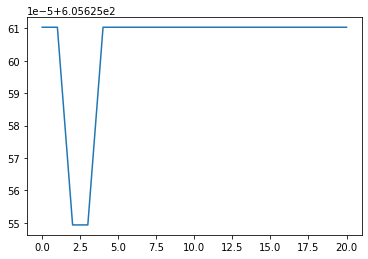

In [57]:
plt.plot(out["loss"])

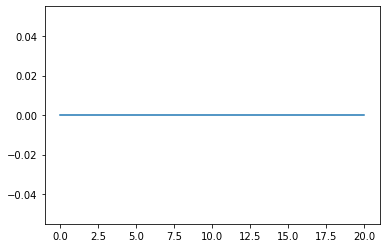

In [58]:
plt.plot(out["accuracy"])

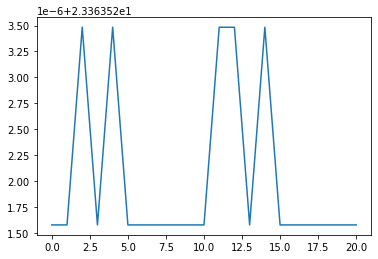

In [59]:
plt.plot(out["mean_absolute_error"])

In [60]:
pred=model.predict(x_test)

In [61]:
model.evaluate(x=x_test,
                     y=y_test,
                     verbose=1)

3/3 [==============================] - 0s 6ms/step - loss: 646.6478 - mean_absolute_error: 24.1150 - mean_squared_error: 646.6478 - accuracy: 0.0000e+00


[646.6477661132812, 24.114999771118164, 646.6477661132812, 0.0]

In [64]:
import sklearn
sklearn.metrics.r2_score(pred,y_test)

0.0

<h1>As model is extremely bad, i had to learn more about hyper parameter tuning to gain alteast a locial accuracy. </h1>

# fuel prediction  using ml algo: <br>
1- RandomForest<br>
2- LinearRegression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [67]:
pred=model.predict(x_test)

In [68]:
y_test

397    31.0
278    31.5
366    17.6
374    23.0
264    18.1
       ... 
148    26.0
285    17.0
351    34.4
197    29.0
356    32.4
Name: mpg, Length: 80, dtype: float64

In [69]:
pred

array([28.55472964, 31.71344694, 23.87038936, 26.55311313, 22.97116792,
       36.34538526, 29.61736129, 14.68798283, 21.68764996, 11.13926003,
       29.15975054, 33.37404632, 31.34089919, 34.87822187, 27.95641082,
       20.80878052, 22.34872786, 30.3213286 , 25.99426833, 15.60071123,
       22.8964919 , 21.25603292, 30.06584091, 25.59323833, 27.97032623,
       35.8815517 , 15.45918327, 32.0217835 , 28.48181621,  8.98662602,
       26.57691848, 21.38085793, 11.68622753, 19.63216941, 23.87333434,
       13.76497496, 12.63180426, 31.02815535, 29.55661499, 12.46047955,
       13.57843764, 33.49788611, 12.87268957, 28.88898447, 33.42104664,
       30.36698638, 16.41239245, 19.75064708, 31.31997548, 24.01244765,
       32.22358585, 20.12846581, 17.38986749, 31.80967994, 29.5988342 ,
       24.16622181, 20.3447967 , 32.83702957, 16.6220742 , 17.60730547,
       23.41988403, 29.53606906, 19.11560153, 31.75679279, 11.40905719,
        9.48464728, 24.54621326, 16.69210341, 20.03289717, 30.48

In [70]:
def reshap(data):
  out=np.array(data).reshape(1,-1)
  return out

In [71]:
reshap(pred).shape

(1, 80)

In [72]:
y_test.shape

(80,)

In [73]:
import sklearn
sklearn.metrics.mean_squared_error(reshap(pred),reshap(y_test))

11.479254747656661

In [74]:
sklearn.metrics.r2_score(pred,y_test)  # best possible score is 1.

0.7803167328313982

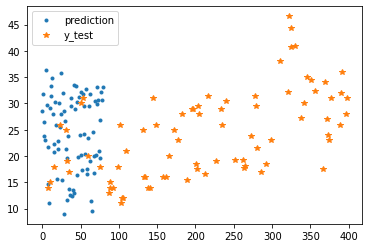

In [75]:
plt.plot(pred,".")
plt.plot(y_test,"*")
plt.legend(["prediction","y_test"])

In [76]:
from sklearn.feature_selection import mutual_info_regression
m1=mutual_info_regression(x_train,y_train)

In [77]:
x_train.columns

Index(['cylinders', 'displacement', 'weight', 'acceleration', 'model year',
       'origin', 'car_encode_name', 'horse_power_update'],
      dtype='object')

In [78]:
c1=model.coef_

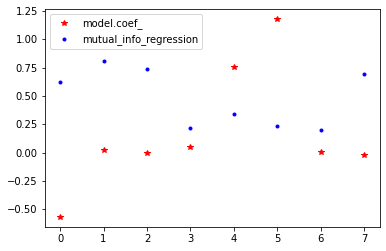

In [79]:
for i in range(len(x_train.columns)):
  plt.plot(i,c1[i],"*r")
  plt.plot(i,m1[i],".b")
  plt.legend(["model.coef_","mutual_info_regression"])

In [80]:
# m-2 Random Forest
from sklearn.ensemble import RandomForestRegressor

In [81]:
model=RandomForestRegressor()

In [82]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [83]:
pred=model.predict(x_test)
pred

array([27.732, 33.889, 23.965, 25.746, 18.619, 37.246, 27.854, 14.175,
       19.202, 12.28 , 26.987, 35.592, 29.638, 35.025, 26.76 , 20.391,
       19.479, 31.423, 24.564, 14.917, 24.837, 18.181, 32.45 , 27.355,
       25.548, 35.486, 14.289, 28.62 , 29.696, 12.76 , 24.378, 20.5  ,
       13.34 , 18.623, 23.045, 14.46 , 13.96 , 31.997, 28.888, 14.739,
       13.879, 33.161, 14.715, 31.95 , 41.169, 28.678, 17.437, 16.618,
       31.06 , 21.093, 32.28 , 17.848, 18.01 , 33.657, 29.664, 24.835,
       19.794, 33.736, 16.527, 16.034, 22.569, 24.623, 20.812, 32.473,
       14.66 , 12.9  , 23.08 , 16.842, 19.537, 28.617, 19.444, 29.029,
       34.039, 32.626, 18.951, 26.514, 17.598, 35.161, 29.248, 33.388])

In [84]:
sklearn.metrics.r2_score(pred,y_test)  # best possible score is 1

0.8724281709413734